# A semi-global alignment

### Objective

Compute a semi-global alignment between the sequences AAATGACGGATTG 
and TGGGA using the costs 1, -1, -1 for match, mismatch and gap, respectively.
Use an AlignmentGraph to store the alignment. 
Print the score and the resulting alignment to the standard output.

#### Hint

A semi-global alignment is a special form of an overlap alignment often
used when aligning short sequences against a long sequence. 
Here we only allow free end-gaps at the beginning and the end of the shorter sequence.



'/home/jack/Desktop/BioInformatica/Script/semi_global_alignment'

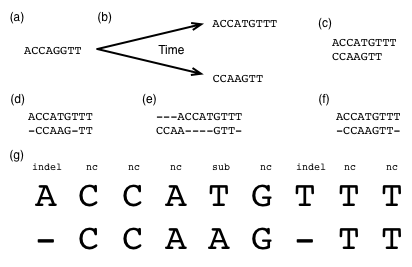

In [15]:
from IPython.display import Image
import sys
sys_path = sys.path[0]
path = sys_path+"/alignment.png"

Image(filename = path, width=500, height=500)

In [18]:
def random_sequence(length):
    """ 
    generate random sequence of length parameter input
    """
    import random as rnd
    
    seq = ''
    
    for i in range(length):
        seq += rnd.choice(['A','T','C','G'])
    
    return seq


def insert_gap(seq):
    
    import random as rnd
    
    for i in range(len(seq)):
        if rnd.random() < 0.1: # 10 % of gap
            idx = rnd.randrange(len(seq))
            seq = seq[:idx] + '-' +seq[idx:]
            
    return(seq)

def score_alignment(ref,seq):
    
    """ inside test_alignment s1 and s2 have same length """
    match = +1 
    mismatch = -1
    gap = -1
    
    alignment_graph=[]         # tot score for each element 

    
    for index_start in range(0,len(ref)-len(seq) ):# num of all possible direct alignment  
        
        alignment_score=[]
        alignment_seq = ''
            
        for i in range(len(seq)):

            if seq[i] == ref[index_start+i]:

                score = match
                alignment_seq += '|'


            elif seq[i]=='-':
                score = gap
                alignment_seq +='-'

            else:                   
                score = mismatch
                alignment_seq += 'x'


            alignment_score.append(score) # score for each position of the aligment
            #print(score, seq[i], ref[index_start+i] )
            
        total_score = sum(alignment_score)
        
        result = [ total_score , (" "*index_start) + seq , index_start ]
        
        alignment_graph.append(result)
        
        new_s = print_out(seq,ref,index_start,total_score,alignment_seq)
    
    alignment_graph.sort(key=lambda x: x[0], reverse=True ) # sort total_score
    
    return alignment_graph




def print_out(seq,ref,index_start,total_score,alignment_seq):
    
    print('\nReference \t',ref)
    
    alignment_seq = ( " " * index_start ) + alignment_seq
    print('\t\t',alignment_seq)
    
    new_seq = ( " " * index_start ) + seq
    print('Sequence \t',new_seq)
    print('Total score ',total_score)
    print('Start reference alignment ', index_start)
    print('\n\n')
    return(new_seq)

def get_unique(list_inp):
    res_list = []
 
    for item in list_inp: 
        if item not in res_list: 
            res_list.append(item) 
    return res_list
        
def main():
    
    #REF = 'AAGGGTTTCTG'       # reference
    #SEQ = 'TGGG'              # sequence
    
    REF = random_sequence(50)
    SEQ = random_sequence(10)


    gapped = insert_gap(SEQ)
    res = score_alignment(REF,gapped)
    results = get_unique(res)

    print('*'*80)
    print(' Best alignment result ')
    print(' REF ',REF)
    print(' SEQ ',res[0][1])
    print(' index start ',res[0][2])
    print(' score ',res[0][0])
    print('*'*80)

if __name__=='__main__':
    main()


Reference 	 GAACTGGTGGACTGCTTTCTGGAGATTCCAGACGTAGTAGATGTTCCGCG
		 -xxxxxxxx||
Sequence 	 -GCTGCTGCGA
Total score  -7
Start reference alignment  0




Reference 	 GAACTGGTGGACTGCTTTCTGGAGATTCCAGACGTAGTAGATGTTCCGCG
		  -x|||x||xxx
Sequence 	  -GCTGCTGCGA
Total score  -1
Start reference alignment  1




Reference 	 GAACTGGTGGACTGCTTTCTGGAGATTCCAGACGTAGTAGATGTTCCGCG
		   -xxx|xx|xxx
Sequence 	   -GCTGCTGCGA
Total score  -7
Start reference alignment  2




Reference 	 GAACTGGTGGACTGCTTTCTGGAGATTCCAGACGTAGTAGATGTTCCGCG
		    -xxxxxxx|xx
Sequence 	    -GCTGCTGCGA
Total score  -9
Start reference alignment  3




Reference 	 GAACTGGTGGACTGCTTTCTGGAGATTCCAGACGTAGTAGATGTTCCGCG
		     -|x||xxxx|x
Sequence 	     -GCTGCTGCGA
Total score  -3
Start reference alignment  4




Reference 	 GAACTGGTGGACTGCTTTCTGGAGATTCCAGACGTAGTAGATGTTCCGCG
		      -|xx|xxxxxx
Sequence 	      -GCTGCTGCGA
Total score  -7
Start reference alignment  5




Reference 	 GAACTGGTGGACTGCTTTCTGGAGATTCCAGACGTAGTAGATGTTCCGCG
		    